# **Name:** Byaravalli Arun Suhag
**EID:** 53265857


# **Name:** Ninad Tungare

**EID:** 53193095


**Competition Name:** AlphaBase

**Team Name:** Killer Bee

# CS4487 - Course Project

Due date: Nov 25, 11:59pm

## Goal
You can select your course project as _one_ of the following competitions:

### 1. [Allstate Claims Severity](https://www.kaggle.com/c/allstate-claims-severity): predict the cost of claims
(This is hosted on Kaggle)

> When you’ve been devastated by a serious car accident, your focus is on the things that matter the most: family, friends, and other loved ones. Pushing paper with your insurance agent is the last place you want your time or mental energy spent. This is why Allstate, a personal insurer in the United States, is continually seeking fresh ideas to improve their claims service for the over 16 million households they protect.

> Allstate is currently developing automated methods of predicting the cost, and hence severity, of claims. In this recruitment challenge, Kagglers are invited to show off their creativity and flex their technical chops by creating an algorithm which accurately predicts claims severity. Aspiring competitors will demonstrate insight into better ways to predict claims severity for the chance to be part of Allstate’s efforts to ensure a worry-free customer experience.

### 2. [Alphabase](http://www.alphabase.ai): predict the investment outcome
(This is hosted on Alphabase.ai)

> Traditionally, investors have performed long-term fundamental analysis by studying the income statements, balance sheets, and other publicly available information about a company’s operations. Then, they use this information in the context of the company’s market value to make an informed decision about its prospects as a long-term investment.

> The automation of this process, systematic value investing, has become possible with the emergence of high-quality data on company fundamentals and the ever-increasing computational power available to researchers. Machine learning becomes an efficient tool in the process of systematic value investing by employing a learning algorithm which programmatically searches for methods of selecting, weighting, and transforming a company’s financial data that (in the context of its current price) best predict how the company will perform as an investment.

> The prediction task is based on framework described above. You will be provided with two separate datasets. Use the training data to train your machine learning algorithm. In total, there are 55 features (companies’ financial data) in our datasets. For each feature, however, three different methods are used to process the data, and then get 165 feature columns in the datasets. Target in the last column is the binary class you're trying to predict (investment outcome).

## Groups
Group projects with at most 2 students are allowed.  To sign up for a group, go to Canvas and under "People", join one of the existing "Project Groups".  _For group projects, the project report must state the percentage contribution from each project member._

## Methodology
You are free to choose the methodology to solve the task.  In machine learning, it is important to use domain knowledge to help solve the problem.  Hence, instead of blindly applying the algorithms to the data you need to think about how to represent the data in a way that makes sense for the algorithm to solve the task. 


## Evaluation on Kaggle/Alphabase

Besides evaluating on the validation set, you need to submit your test results to Kaggle or Alphabase for evaluation.

## Project Presentation

Each project group needs to give a presentation at the end of the semester.  The presentation time is 8 minutes.  You _must_ give a presentation.

## What to hand in
You need to turn in the following things:

1. This ipynb file with your source code and documentation.
2. Your final submission file to Kaggle/Alphabase.
3. Presentation slides.

Files should be uploaded to "Course Project" on Canvas.


## Grading
The marks of the assignment are distributed as follows:
- 50% - Results using various feature representations, dimensionality reduction methods, classifiers, etc.
- 20% - Trying out feature representations (e.g. adding additional features, combining features from different sources) or methods not used in the tutorials.
- 15% - Quality of the written report.  More points for insightful observations and analysis.
- 15% - Project presentation.
<hr>

In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
import IPython.utils.warn as warn
random.seed(100)
import json
import csv

/home/ninadt/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ninadt/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/ninadt/anaconda2/lib/python2.7/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarnin

Helper functions for AlphaBase

In [2]:
def load_alphabase(fname):
    head = []
    data = []
    with open(fname, 'rU') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        trainingset = False
        for row in reader:
            if len(head) == 0:
                head = row
                if head[-1] == "Target":
                    trainingset = True                
            else:
                # process the list into an array
                for i in range(len(row)):
                    if row[i] == "NA":
                        row[i] = None  
                if trainingset and (row[-1] is None):
                    print "skipping row w/ NA target"
                else:
                    data.append(array(row, dtype=float))

    # concatenate
    data2 = array(data)

    # training set
    if trainingset:
        dataX = data2[:,0:-1]
        dataY = data2[:,-1].astype(int)        
        return dataX, dataY, head[0:-1]
    else:
        # test set
        dataX = data2[:,1:]
        dataID = data2[:,0].astype(int)
        return dataX, dataID, head[1:]

In [3]:
import csv

def write_csv_alphabase(fname, YID, Yprob):
    # fname = file name
    # Yprob is a list/array with probabilities of class 1
    # YID is the test case ID number
    
    if ndim(Yprob) != 1:
        raise "ERROR: Yprob should be a list of probabilites for class 1"

    # write CSV file
    f = open(fname, 'wb')
    f.write("ID,Target\n")

    # add ID numbers for each Y
    for (i,y) in enumerate(Yprob):
        f.write("%d,%0.9f\n" % (YID[i], y))
        
    f.close()    

In [4]:
trainX, trainY, featnames = load_alphabase('Competition_I/train.csv')
testX, testID, _ = load_alphabase('Competition_I/test.csv')

dateset size

In [5]:
print trainX.shape
print trainY.shape
print testX.shape
print testID.shape

(159688, 165)
(159688,)
(53001, 165)
(53001,)


In [6]:
#You can use Imputer to fill-in the missing values with the mean value. You can try some other strategies too.

# NOTE: does the replacement in place (doesn't make a copy)
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0, copy=False)
imp.fit(trainX)

# replace the missing values
imp.transform(trainX)
imp.transform(testX);

In [7]:
# class breakdown
print "class 0 size: " + str(count_nonzero(trainY==0))
print "class 1 size: " + str(count_nonzero(trainY==1))

class 0 size: 80097
class 1 size: 79591


- There are 55 features in the datasets. For each feature, there are three different methods to process the data, resulting in 165 total features.
- Feature columns with titles suffixed by "_mm" are normalised by Min-Max Scaling. 
- Those with titles suffixed by "_z" are z-score of the original data. 
- While the others with titles suffixed by "_p" are percentile rankings of the data.

You can use all 3 types of features, or select only one type.

In [8]:
# make masks for each type of feature
mm_mask = array(map(lambda x: x.endswith('_mm'), featnames))
z_mask  = array(map(lambda x: x.endswith('_z'), featnames))
p_mask  = array(map(lambda x: x.endswith('_p'), featnames))

In [9]:
# select z-score set
trainXz = trainX[:,z_mask]
testXz  = testX[:,z_mask]
print trainXz.shape
print testXz.shape

(159688, 55)
(53001, 55)


In [10]:
# select mm-score set
trainXm = trainX[:,mm_mask]
testXm  = testX[:,mm_mask]
print trainXm.shape
print testXm.shape

(159688, 55)
(53001, 55)


In [11]:
# select p-score set (percentile rankings of the data)
trainXp = trainX[:,p_mask]
testXp  = testX[:,p_mask]
print trainXp.shape
print testXp.shape

(159688, 55)
(53001, 55)


In [12]:
print trainY.shape

(159688,)


## NB Gaussian classifier

In [13]:
## use Mean Imputer to fill up the NaN values (missing values in the data set)

In [14]:
# learn simple Naive Bayes Gaussian model using p_score
model = naive_bayes.GaussianNB()
model.fit(trainXp, trainY)

# predict probabilities
trainYpred = model.predict_proba(trainXp)

# compute log-loss on the training set
LL = metrics.log_loss(trainY, trainYpred)
print "log-loss = " + str(LL)

log-loss = 0.694627468771


In [15]:
# predict on the test set
testYprob = model.predict_proba(testXp)

# save the submission file
# NOTE: you need to save the probability of class 1
write_csv_alphabase("alphabase_test_nb_p.csv", testID, testYprob[:,1])

# result: 0.6978282

## Classification using Neural Network

In [16]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.regularizers import l1l2
from keras.optimizers import SGD
import numpy as np
# fix random seed for reproducibility

# create categorical labels
labels = to_categorical(np.asarray(trainY))
print labels

[[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]


Using Theano backend.


In [17]:
# shuffle train data
VALIDATION_SPLIT = 0.3
indices = np.arange(trainXp.shape[0])
np.random.shuffle(indices)
data = trainXp[indices]
labels = labels[indices]

# create model
model = Sequential()
model.add(Dense(output_dim=30, input_dim=55, activation='relu'))
model.add(Dense(output_dim=2, activation='softmax'))
# Compile model
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print "Model Compiled"

history = model.fit(data, labels, validation_split=0.3, nb_epoch=20, batch_size=10)

Model Compiled
Train on 111781 samples, validate on 47907 samples
Epoch 1/20
111781/111781 [==============================] - 3s - loss: 8.0592 - acc: 0.5000 - val_loss: 8.0003 - val_acc: 0.5036
Epoch 2/20
111781/111781 [==============================] - 3s - loss: 8.0477 - acc: 0.5007 - val_loss: 8.0003 - val_acc: 0.5036
Epoch 3/20
111781/111781 [==============================] - 3s - loss: 8.0477 - acc: 0.5007 - val_loss: 8.0003 - val_acc: 0.5036
Epoch 4/20
111781/111781 [==============================] - 3s - loss: 8.0477 - acc: 0.5007 - val_loss: 8.0003 - val_acc: 0.5036
Epoch 5/20
111781/111781 [==============================] - 3s - loss: 8.0477 - acc: 0.5007 - val_loss: 8.0003 - val_acc: 0.5036
Epoch 6/20
111781/111781 [==============================] - 3s - loss: 8.0477 - acc: 0.5007 - val_loss: 8.0003 - val_acc: 0.5036
Epoch 7/20
111781/111781 [==============================] - 3s - loss: 8.0477 - acc: 0.5007 - val_loss: 8.0003 - val_acc: 0.5036
Epoch 8/20
111781/111781 [=====

['acc', 'loss', 'val_acc', 'val_loss']


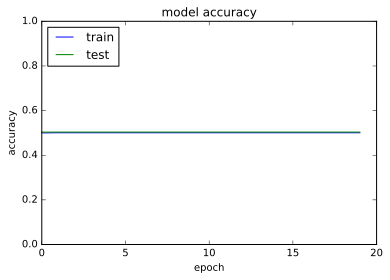

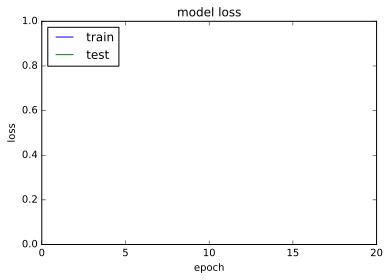

In [18]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.axis([0, 20, 0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.axis([0, 20, 0, 1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
trainYpred = np.array(model.predict_proba(trainXp, verbose=0))

# compute log-loss on the training set
LL = metrics.log_loss(trainY, trainYpred)
print "log-loss = " + str(LL)
print trainYpred

log-loss = 17.2146670524
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]


In [20]:
# predict on the test set
testYprob = np.array(model.predict_proba(testXp, verbose=0))

print testYprob

# save the submission file
# NOTE: you need to save the probability of class 1
write_csv_alphabase("alphabase_test_k.csv", testID, testYprob[:,1])

# result: 1.1006474 .

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]
